# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [2]:
# Libraries
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [7]:
# your code here
employee = pd.read_csv('../Aula_24/employee.csv')

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [8]:
employee.head(2)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30


In [12]:
# Method 1
# your code here
employee.groupby(by='Department')['Salary'].agg(mean_salary = 'mean').reset_index()

,Department,mean_salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [17]:
# Method 2
# your code here
employee.pivot_table(index=['Department'], values=['Salary']).reset_index()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [19]:
# your code here
employee.pivot_table(index=['Department', 'Title'], values=['Salary']).reset_index()

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [27]:
# your code here
employee.pivot_table(index=['Title'], columns=['Years'],values=['Salary'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [73]:
# your code here
employee.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc={'Salary':['mean', 'count']}).T

Department                HR    IT  Sales
             Title                       
Salary count VP          1.0   1.0    NaN
             analyst     2.0   2.0    NaN
             associate   NaN   1.0    2.0
       mean  VP         70.0  70.0    NaN
             analyst    32.5  32.5    NaN
             associate   NaN  60.0   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [72]:
# your code here
employee.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc={'Salary':['median', 'min', 'max', 'std']}).T

Department                      HR         IT  Sales
              Title                                 
Salary max    VP         70.000000  70.000000    NaN
              analyst    35.000000  35.000000    NaN
              associate        NaN  60.000000   55.0
       median VP         70.000000  70.000000    NaN
              analyst    32.500000  32.500000    NaN
              associate        NaN  60.000000   55.0
       min    VP         70.000000  70.000000    NaN
              analyst    30.000000  30.000000    NaN
              associate        NaN  60.000000   55.0
       std    analyst     3.535534   3.535534    NaN
              associate        NaN        NaN    0.0

In [ ]:
"""
Salaries are equal for the same roles in HR and IT departments.
Associates have a higher income workin in IT.
Both associates in Sales have the same salary.
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [71]:
# your code here
employee.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc={'Salary':['median', 'min', 'max', 'std']}, fill_value=0).T


Department                      HR         IT  Sales
              Title                                 
Salary max    VP         70.000000  70.000000    0.0
              analyst    35.000000  35.000000    0.0
              associate   0.000000  60.000000   55.0
       median VP         70.000000  70.000000    0.0
              analyst    32.500000  32.500000    0.0
              associate   0.000000  60.000000   55.0
       min    VP         70.000000  70.000000    0.0
              analyst    30.000000  30.000000    0.0
              associate   0.000000  60.000000   55.0
       std    VP          0.000000   0.000000    0.0
              analyst     3.535534   3.535534    0.0
              associate   0.000000   0.000000    0.0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [70]:
# your code here
employee.pivot_table(index=['Department'], values=['Salary', 'Name'], aggfunc={'Salary':'sum', 'Name':'count'}).T

Department,HR,IT,Sales
Name,3,4,2
Salary,135,195,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [75]:
# your code here
employee.pivot_table(index=['Department'], columns=['Title'], values=['Salary', 'Years'], aggfunc={'Salary':'mean', 'Years':'sum'}).T

Department          HR    IT  Sales
       Title                       
Salary VP         70.0  70.0    NaN
       analyst    32.5  32.5    NaN
       associate   NaN  60.0   55.0
Years  VP          8.0   8.0    NaN
       analyst     6.0   3.0    NaN
       associate   NaN   7.0    5.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [76]:
# your code here
fitbit = pd.read_csv('../Aula_24/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [78]:
# your code here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [143]:
fitbit_profile = ProfileReport(fitbit)

In [ ]:
fitbit_profile

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

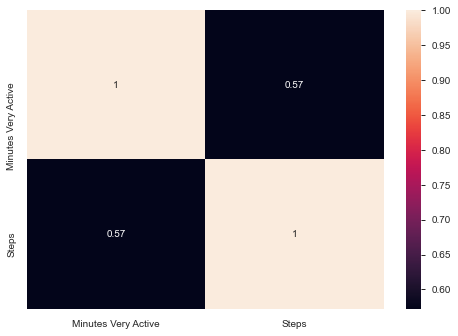

In [85]:
# your code here
sns.heatmap(fitbit[['Minutes Very Active', 'Steps']].corr(), annot=True);

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [86]:
import matplotlib.pyplot as plt;

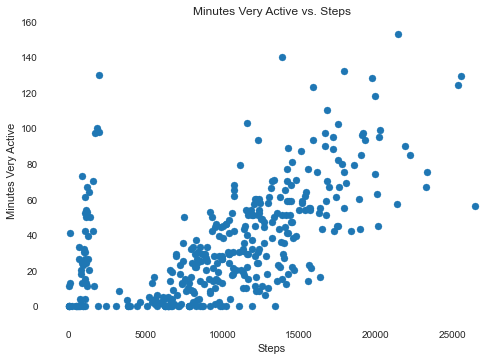

In [90]:
plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.title('Minutes Very Active vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
In general the more steps, the more active one is.
But the relationship between these two variables, if inputed correctly, 
indicates that activities that do not involve running/walking are also being considered. 
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

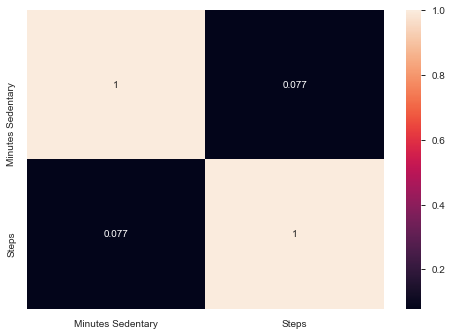

In [91]:
# your code here
sns.heatmap(fitbit[['Minutes Sedentary', 'Steps']].corr(), annot=True);

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

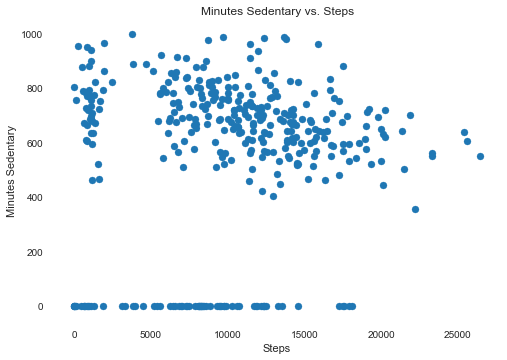

In [92]:
# your code here
plt.scatter(fitbit['Steps'], fitbit['Minutes Sedentary'])
plt.title('Minutes Sedentary vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.show()

In [ ]:
"""
There doesn't seem to be a linear relationship between minutes beign sedentary
and the amount of steps one takes. 
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

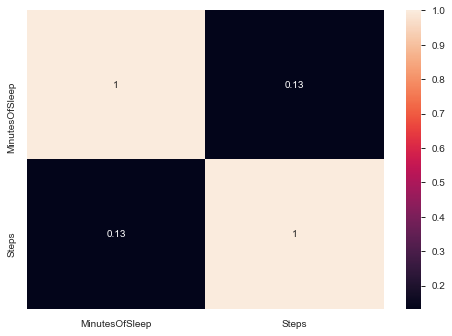

In [93]:
# your code here
sns.heatmap(fitbit[['MinutesOfSleep', 'Steps']].corr(), annot=True);

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

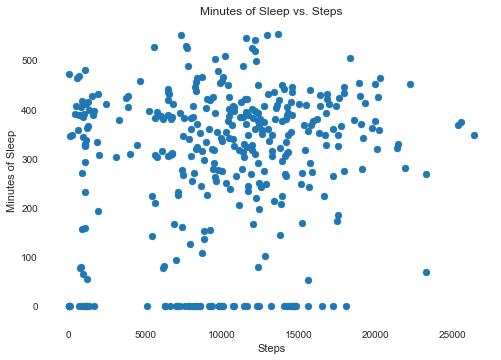

In [94]:
# your code here
plt.scatter(fitbit['Steps'], fitbit['MinutesOfSleep'])
plt.title('Minutes of Sleep vs. Steps')
plt.xlabel('Steps')
plt.ylabel('Minutes of Sleep')
plt.show()

In [ ]:
"""
There doesn't seem to be a linear relationship between minutes of sleep
and the amount of steps one takes. 
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [96]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

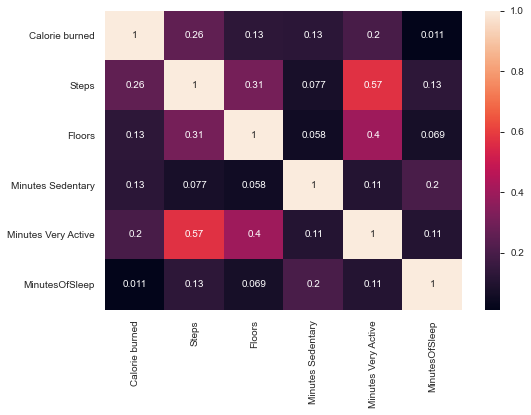

In [103]:
# your code here
cor_fit=fitbit.loc[:,columns]
sns.heatmap(cor_fit.corr(), annot=True);

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [108]:
# your code here
cor_fit.corr()['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [138]:
# your code here
time_grades = pd.read_csv('../Aula_24/time_grades.csv')
time_grades.head(2)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7


#### Show visually the frequency distribution of the `time_grades` dataset.

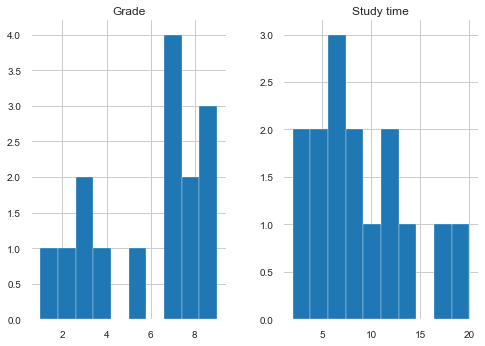

In [126]:
# your code here
time_grades.hist();

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [135]:
# your code here
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
pearson = pearsonr(time_grades['Study time'], time_grades['Grade'])
spearman = spearmanr(time_grades['Study time'], time_grades['Grade'])
print(pearson,'\n', spearman)

(0.7980456073578858, 0.0003627635256342731) 
 SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


In [ ]:
"""
There'a a high positive correlation between the 
time spent studying and the grade obtained in the test.
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

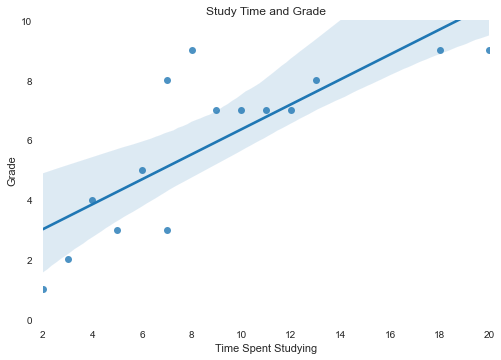

In [142]:
# your code here
sns.regplot(time_grades['Study time'], time_grades['Grade'])
plt.title('Study Time and Grade')
plt.ylim((0,10))
plt.xlabel('Time Spent Studying')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
There seems to be a linear relationship between the time spent
studying and the grade obtained in the test, with a few exceptions.
"""

#### Could you explain the difference between Pearson and Spearman correlations?

* **<font color=blue>Pearson Correlation:** The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.
    
* **<font color=orange>Spearman Correlation:** The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but no necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 